# Data Preparation

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [81]:
df = pd.read_csv("../test_data/LV_spectra/Lv220K.csv")

In [82]:
df.shape

(212, 650)

### Data normalization

In [83]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Data visualization

In [84]:
import plotly.express as px
fig = px.imshow(df, 
                color_continuous_scale='gray',
                labels=dict(x="Columns", y="Rows", color="Values"))
fig.show()

## Curve selection

In [89]:
df_selected = df.iloc[:180, 210:370]

In [86]:
df_selected.shape

(180, 155)

## Curve resize

In [90]:
from skimage.transform import resize

resized_image = resize(df_selected.values, (256, 256), mode='reflect', anti_aliasing=True)

df_resized = pd.DataFrame(resized_image).iloc[::-1].reset_index(drop=True)

print(df_resized.shape)

(256, 256)


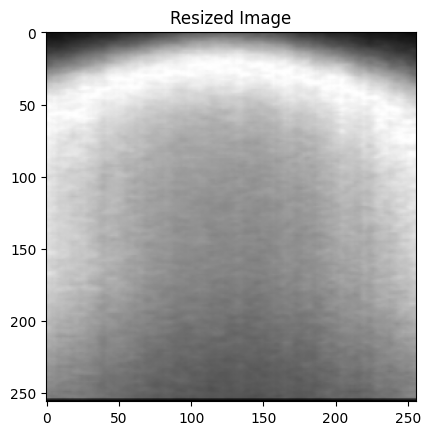

In [91]:
import matplotlib.pyplot as plt

plt.imshow(df_resized, cmap='gray')
plt.title("Resized Image")
plt.show()

# Model prediction

In [11]:
import torch.nn as nn
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = nn.Sequential(
    nn.Conv2d(1, 8, (5, 5), padding=2),
    nn.ReLU(True),
    nn.MaxPool2d(2),
    nn.Conv2d(8, 16, (3, 3), padding=1),
    nn.ReLU(True),
    nn.MaxPool2d(4),
    nn.Conv2d(16, 32, (3, 3), padding=1),
    nn.ReLU(True),
    nn.MaxPool2d(4),
    nn.Flatten(),
    nn.Linear(32 * 8 * 8, 16 * 4 * 4),
    nn.ReLU(True),
    nn.Linear(16 * 4 * 4, 64),
    nn.ReLU(True),
    nn.Linear(64, 5)
).to(device)

model.load_state_dict(torch.load('model_weights.pth'))

C:\Users\Hikaro\AppData\Local\Temp\ipykernel_2624\1285405671.py:24: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



<All keys matched successfully>

In [92]:
img_in = torch.tensor(df_resized.values, device=device, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(img_in.shape)

with torch.no_grad():
    output = model(img_in)
    
print(output)

torch.Size([1, 1, 256, 256])
tensor([[1.3147, 1.4735, 6.6706, 1.3618, 7.1631]], device='cuda:0')


In [93]:
print(f"alpha={output[0][0]}\nimp={output[0][1]}\nm={output[0][2]}\nl={output[0][3]}\nlambda={output[0][4]}")

alpha=1.3146778345108032
imp=1.473462462425232
m=6.670584201812744
l=1.361845850944519
lambda=7.1631011962890625


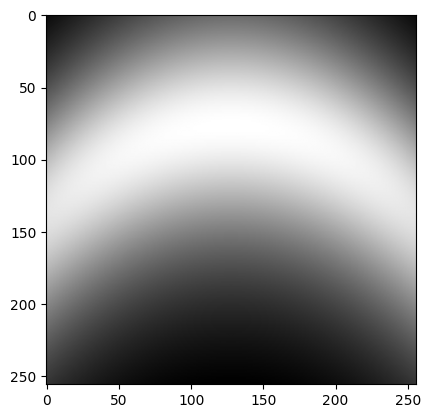

In [94]:
from diplom.functions import generate_spectre_by_values 

plt.imshow(generate_spectre_by_values(output[0])[0][0], cmap='gray')

alpha imp  за уширення
l зсув параболи по енергії
гаусовий шум, шон фирлі 
література оформити
розмір шрифту, тип, інтервал між сроками
додати колор-бар
додати рівень фермі
графік l